In [76]:
import pandas as pd
import pandas_flavor as pf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import janitor
from janitor import remove_columns, rename_column, remove_empty, filter_on, groupby_agg


In [104]:
gdp_df = pd.read_csv("../data/UNdata_Export_20230915_015125007.csv")


cleaned_gdp_df = (
    pd.read_csv("../data/UNdata_Export_20230915_015125007.csv")
    .clean_names()
    .remove_columns("value_footnotes")
    .rename(columns={"country_or_area": "Country", "year": "Year", "value": "GDP_Per_Capita"})
    # .remove_empty()
)


In [126]:
gdp_df_2014 = (cleaned_gdp_df.filter_on('Year == 2014'))

top_and_bottom_five = pd.concat([gdp_df_2014.nlargest(5, 'GDP_Per_Capita'), gdp_df_2014.nsmallest(5, 'GDP_Per_Capita')])
top_and_bottom_five

,Country,Year,GDP_Per_Capita
3919,"Macao SAR, China",2014,155201.740571
3888,Luxembourg,2014,113313.578898
5387,Qatar,2014,95578.261511
5726,Singapore,2014,87616.637527
645,Bermuda,2014,77361.104881
1142,Central African Republic,2014,822.611195
920,Burundi,2014,886.235296
5877,Somalia,2014,917.876549
1530,Dem. Rep. Congo,2014,1029.790813
4756,Niger,2014,1126.805440


(array([90., 59., 21., 20., 13., 12., 11.,  8.,  3.,  1.,  0.,  1.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([   822.61119489,   8541.56766369,  16260.52413249,  23979.48060129,
         31698.43707008,  39417.39353888,  47136.35000768,  54855.30647648,
         62574.26294527,  70293.21941407,  78012.17588287,  85731.13235167,
         93450.08882046, 101169.04528926, 108888.00175806, 116606.95822686,
        124325.91469565, 132044.87116445, 139763.82763325, 147482.78410205,
        155201.74057084]),
 <BarContainer object of 20 artists>)

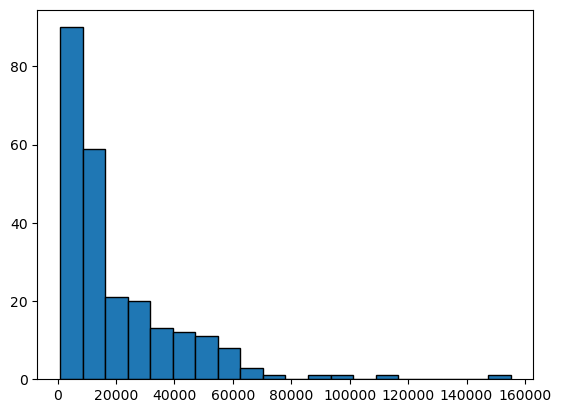

In [123]:
plt.hist(gdp_df_2014['GDP_Per_Capita'], bins=20, edgecolor='k')

In [127]:

gdp_df_1990_2018_pivot = cleaned_gdp_df[cleaned_gdp_df['Year'].isin([1990, 2018])].pivot(index='Country', columns='Year', values="GDP_Per_Capita").dropna(subset=[1990, 2018])

gdp_df_1990_2018_pivot["Percent Change"] = 100 * (gdp_df_1990_2018_pivot[2018] - gdp_df_1990_2018_pivot[1990]) / gdp_df_1990_2018_pivot[1990]
gdp_df_1990_2018_pivot


Year,1990,2018,Percent Change
Country,,,
Africa Eastern and Southern,3083.976800,3697.317275,19.887973
Africa Western and Central,2810.341129,4132.592996,47.049515
Albania,4827.034551,13317.092313,175.885581
Algeria,8746.340762,11630.679409,32.977661
Angola,5758.950488,6982.129420,21.239615
...,...,...,...
Vanuatu,2855.554643,3093.086718,8.318247
Vietnam,2066.372215,9548.700016,362.099710
World,9704.621768,16679.316815,71.869829


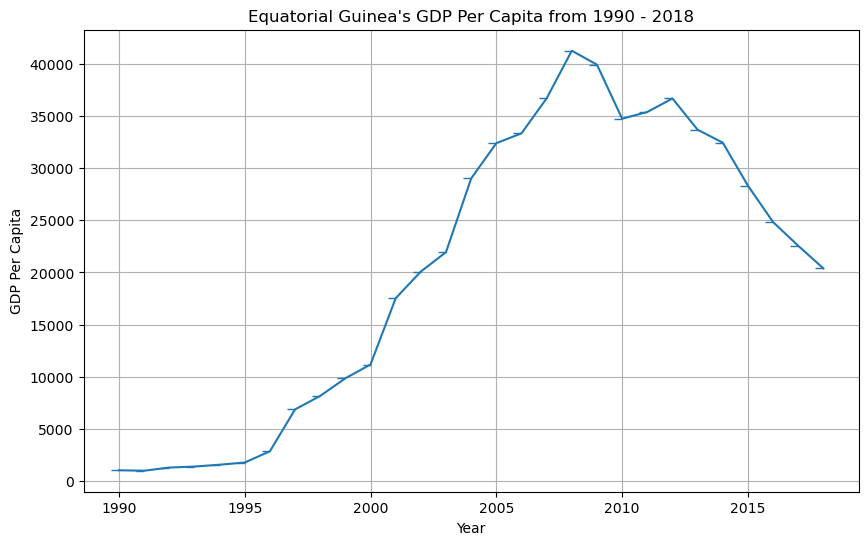

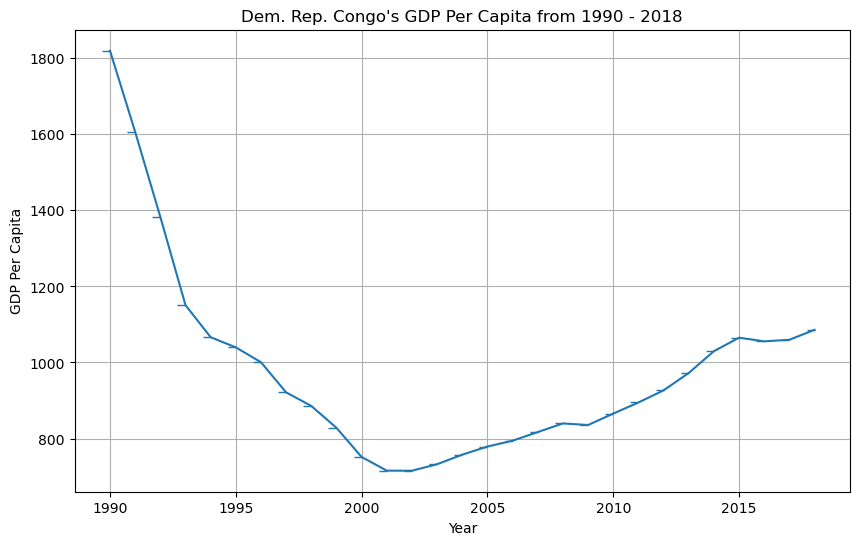

In [131]:

negative_growth_countries = gdp_df_1990_2018_pivot[gdp_df_1990_2018_pivot['Percent Change'] < 0]
negative_growth_countries

highest_growth_country = gdp_df_1990_2018_pivot['Percent Change'].idxmax()
highest_growth_country

highest_growth_value = gdp_df_1990_2018_pivot.loc[highest_growth_country, 'Percent Change']
highest_growth_value

lowest_growth_country = gdp_df_1990_2018_pivot['Percent Change'].idxmin()

country_data_highest_growth_data = cleaned_gdp_df[(cleaned_gdp_df['Country'] == highest_growth_country) & (cleaned_gdp_df['Year'].between(1990, 2018))]
country_data_lowest_growth_data = cleaned_gdp_df[(cleaned_gdp_df['Country'] == lowest_growth_country) & (cleaned_gdp_df['Year'].between(1990, 2018))]

plt.figure(figsize=(10,6))
country_data_highest_growth_data.set_index('Year')['GDP_Per_Capita'].plot(linestyle='-', marker=0)
plt.title(f"{highest_growth_country}'s GDP Per Capita from 1990 - 2018")
plt.ylabel('GDP Per Capita')
plt.xlabel('Year')
plt.grid(True)
plt.show()


plt.figure(figsize=(10,6))
country_data_lowest_growth_data.set_index('Year')['GDP_Per_Capita'].plot(linestyle='-', marker=0)
plt.title(f"{lowest_growth_country}'s GDP Per Capita from 1990 - 2018")
plt.ylabel('GDP Per Capita')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [135]:
continents = pd.read_csv("../data/continents.csv")

gdp_df = pd.merge(cleaned_gdp_df, continents, on='Country', how='inner')
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2020,1970.560169,Asia
1,Afghanistan,2019,2065.036235,Asia
2,Afghanistan,2018,2033.804389,Asia
3,Afghanistan,2017,2058.400221,Asia
4,Afghanistan,2016,2057.067978,Asia
...,...,...,...,...
5577,Zimbabwe,1994,2603.927369,Africa
5578,Zimbabwe,1993,2420.092791,Africa
5579,Zimbabwe,1992,2437.152908,Africa
5580,Zimbabwe,1991,2733.696626,Africa


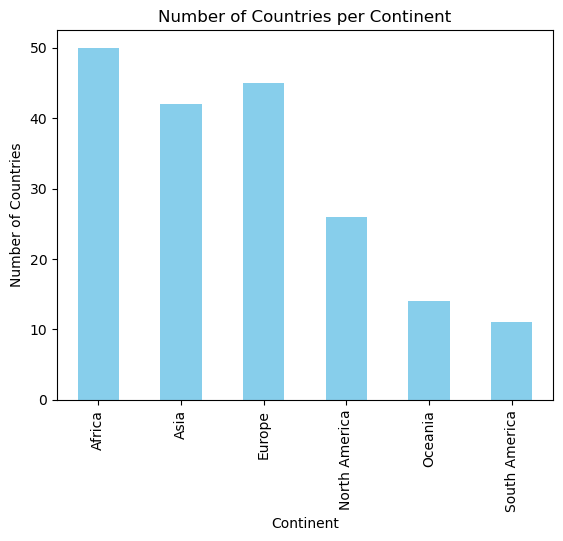

In [163]:
countries_per_continent = (
    gdp_df.groupby_agg(by='Continent', agg='nunique', agg_column_name='Country', new_column_name='num_countries' )
)

countries_per_continent = countries_per_continent.groupby('Continent')['Country'].nunique()
countries_per_continent.plot(kind='bar', color='skyblue')
plt.title('Number of Countries per Continent')
plt.ylabel('Number of Countries')
plt.xlabel('Continent')
plt.xticks(color='black')
plt.show()

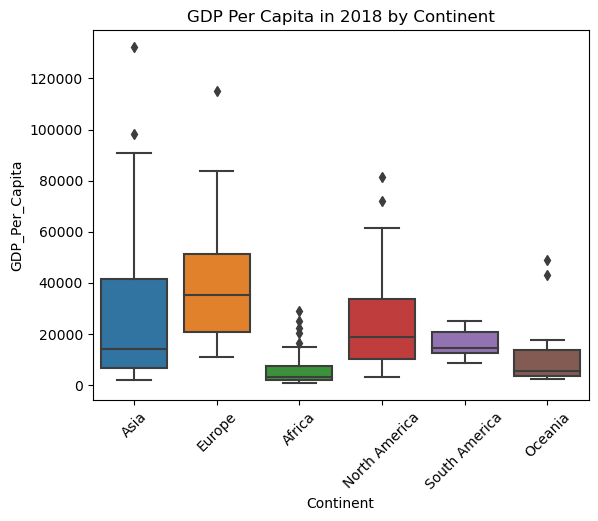

In [165]:
gdp_df_2018 = (gdp_df.filter_on('Year == 2018'))

sns.boxplot(x='Continent', y='GDP_Per_Capita', data=gdp_df_2018)
plt.title('GDP Per Capita in 2018 by Continent')
plt.xticks(rotation=45)
plt.show()



In [181]:
life_expectancy = (
    pd.read_csv('../data/life_expectancy.csv', skiprows=4)
    .remove_columns('Country Code')
    .remove_columns('Indicator Code')
    .remove_columns('Indicator Name')
    .rename(columns={"Country Name": "Country"})
)
life_expectancy

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,66.063000,66.439000,66.757000,...,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,NaN,NaN
1,Africa Eastern and Southern,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,45.249105,45.924905,46.223097,...,61.337917,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,NaN,NaN
2,Afghanistan,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,35.453000,35.924000,36.418000,...,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,NaN,NaN
3,Africa Western and Central,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,39.837827,39.471500,40.085679,...,55.922229,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,NaN,NaN
4,Angola,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,38.757000,39.092000,39.484000,...,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,61.485000,61.836000,62.134000,62.440000,62.734000,63.041000,63.323000,63.653000,63.935000,...,78.880000,78.922000,78.981000,78.783000,78.696000,79.022000,76.567000,76.806000,NaN,NaN
262,"Yemen, Rep.",33.678000,34.098000,33.615000,33.247000,34.738000,35.373000,36.097000,36.866000,37.796000,...,67.384000,65.873000,66.064000,65.957000,64.575000,65.092000,64.650000,63.753000,NaN,NaN
263,South Africa,52.669000,53.085000,53.376000,53.633000,53.906000,54.192000,54.391000,54.626000,54.876000,...,63.380000,63.950000,64.747000,65.402000,65.674000,66.175000,65.252000,62.341000,NaN,NaN
264,Zambia,49.042000,49.452000,49.794000,50.133000,49.849000,50.563000,50.679000,50.802000,50.856000,...,60.699000,61.208000,61.794000,62.120000,62.342000,62.793000,62.380000,61.223000,NaN,NaN


In [183]:
id_vars = ['Country']

value_vars = life_expectancy.columns.difference(id_vars).tolist()

life_expectancy = life_expectancy.melt(id_vars=id_vars, value_vars=value_vars, var_name='Year', value_name='life_expectancy')
life_expectancy

,Country,Year,life_expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
17019,Kosovo,Unnamed: 67,NaN
17020,"Yemen, Rep.",Unnamed: 67,NaN
17021,South Africa,Unnamed: 67,NaN
17022,Zambia,Unnamed: 67,NaN
